# 4ª Etapa

### Gerando dados sintéticos utilizando a biblioteca "random" do 'NumPy'! 

In [1]:
# importando bilblioteca para gerar números alea tórios!
import numpy as np

In [2]:
# Criando um array unidimensional(vetor) com 1000 elementos
# analisaremos apenas os 10 primeiros
np.random.seed(seed=1)
x = np.random.uniform(low=0.0, high=10.0, size=(1000,))
x[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

### Criando uma variável de resposta!

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
np.random.seed(seed=1)
slope = 0.25
intercept = -1.25
y =slope * x + np.random.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept

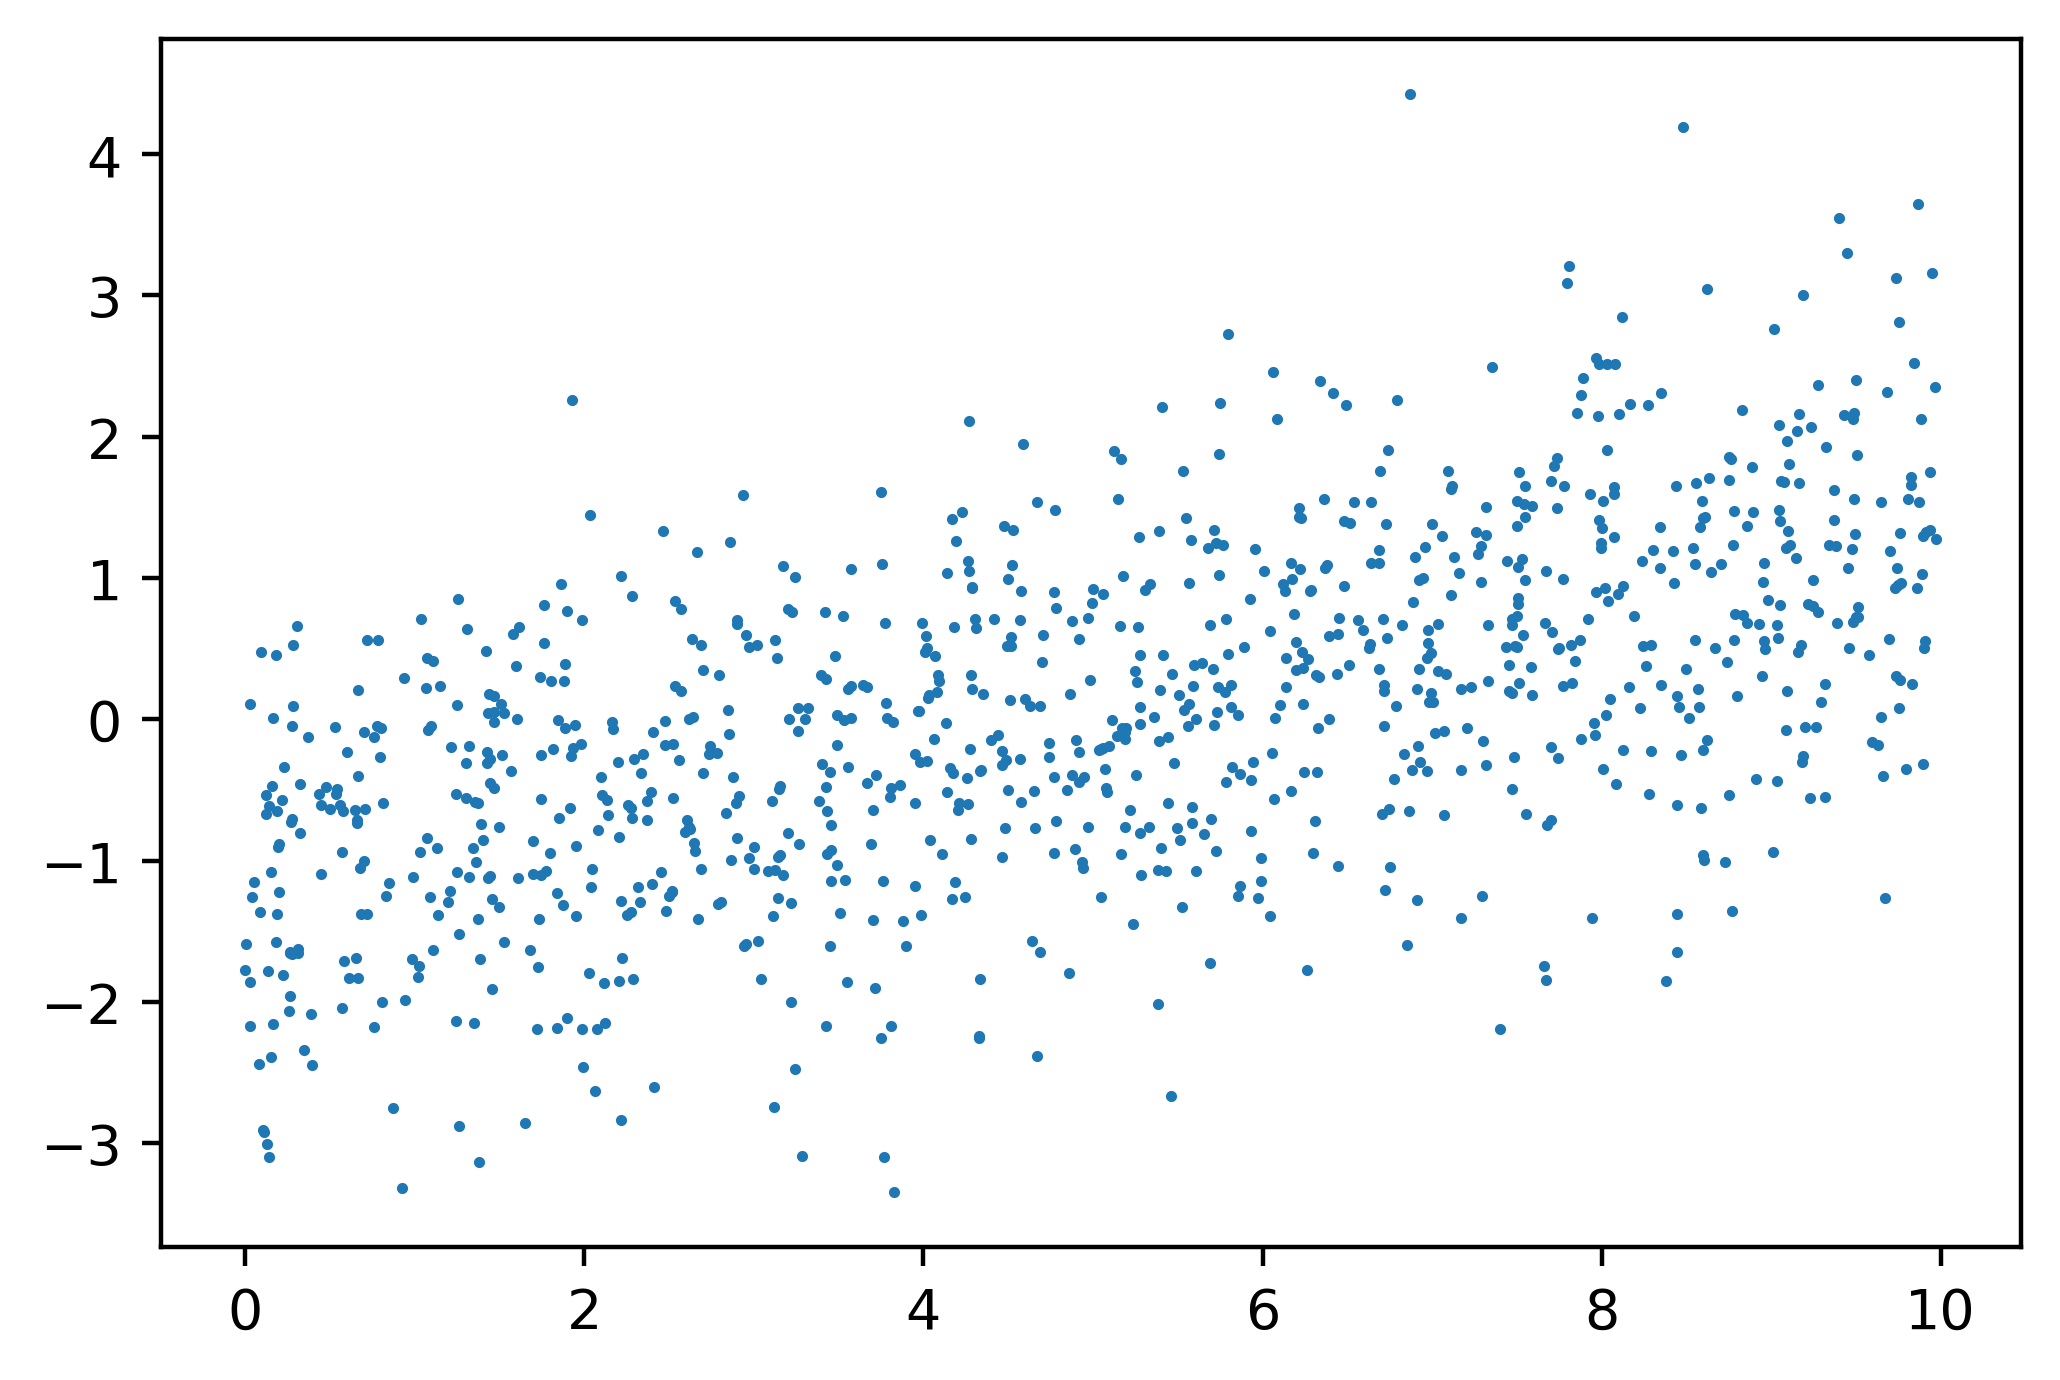

In [5]:
# realizando a plotagem entre x e y
mpl.rcParams['figure.dpi']=400  # definindo a resolução da imagem que será reproduzida
plt.scatter(x,y,s=1) # Obs: 's' aqui representa o tamanho dos pontos

### Estes 👆 são dados ruidosos! Já esperávamos por isso e na próxima etapa realizarei a modelagem dos mesmos!!

## Regressão linear com scikit-learn

##### Irei utilizar os dados sintéticos criados e determinarei uma linha de melhor ajuste ou regressão linear usando o Scikit-Learn. A importação é semelhante à da classe de regressão logistica que vimos na etapa anterior. Nessa etapa irei utilizar os parâmetros "fit_intercept=True", significando que o modelo terá um termo para interceptação. 

In [6]:
# Importando classe de modelo de regressão linear
from sklearn.linear_model import LinearRegression
reg_lin = LinearRegression()
reg_lin


LinearRegression()

#### Agora podemos ajustar o modelo usando nossos dados sinteticos para que as amostras fiqeum ao longo da primeira dimensão

In [7]:
# ajustando a regressão e examinando parâmetros
reg_lin.fit(x.reshape(-1,1),y)
print(reg_lin.intercept_)
print(reg_lin.coef_)

-1.1612566002825886
[0.24002588]


In [8]:
# agora irei usar o modelo para fazer previsões de valores das caracterisicas
y_pred = reg_lin.predict(x.reshape(-1,1))

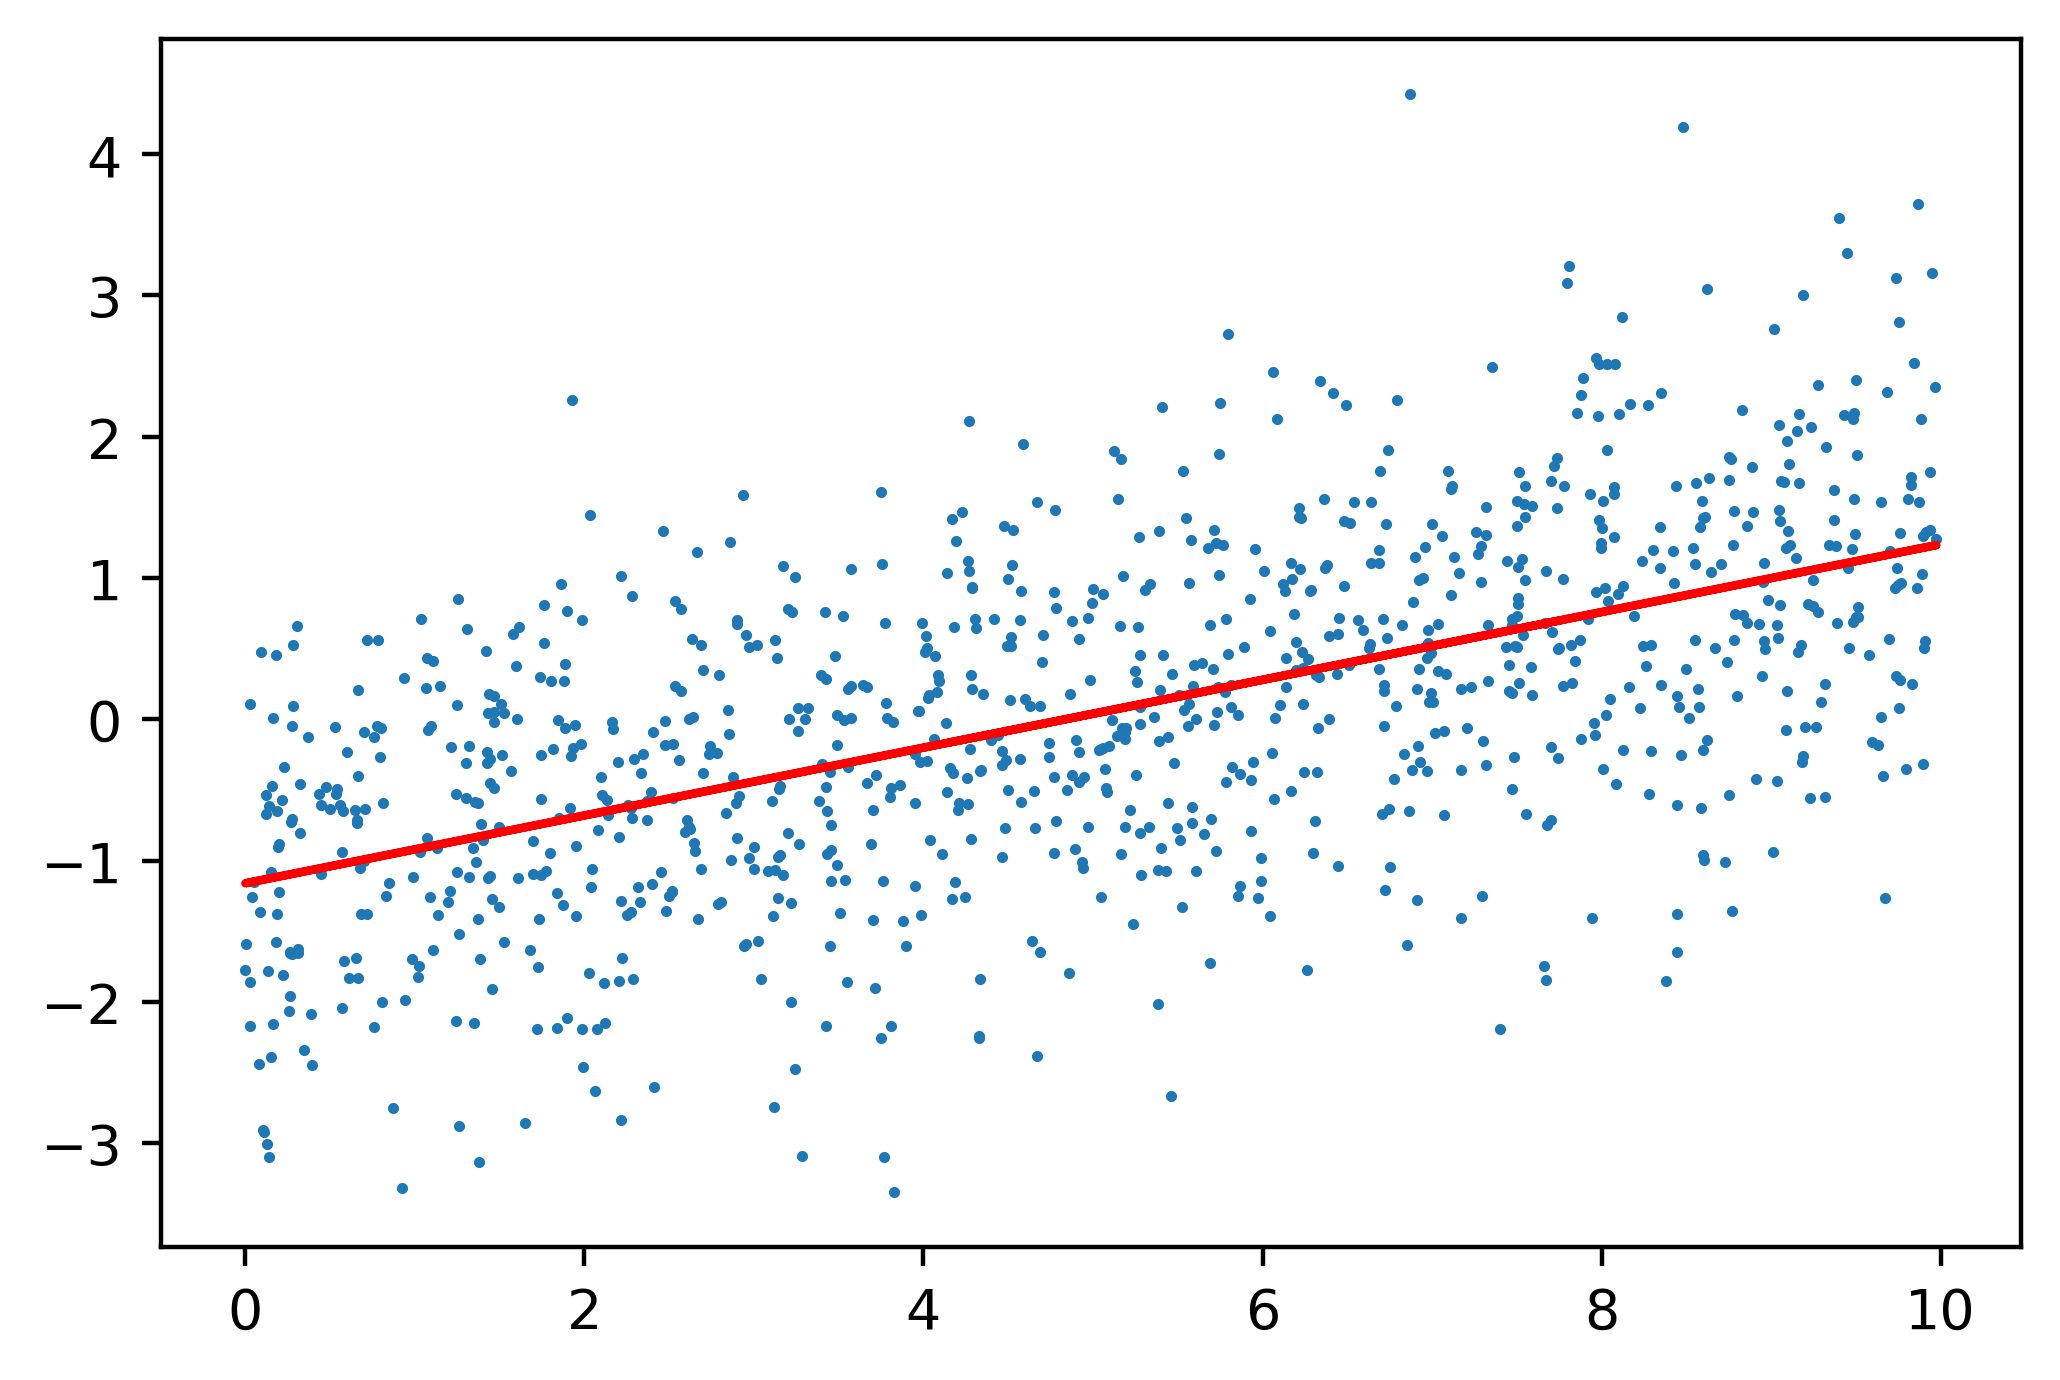

In [9]:
# plotando os dados brutos e fazendo previsões do modelo ajustado feitas para estes dados
plt.scatter(x,y,s=1)
plt.plot(x,y_pred,'r')

### Em machine learning o que nos interessa são os recursos preditivos: queremos modelos que nos ajudem a saber os possiveis resultados de futuros cenários.

In [10]:
# importando o dataframe limpo anteriormente
import pandas as pd
df = pd.read_csv('Capitulo_1_arquivo_limpo.csv')
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values, 
test_size=0.2, random_state=24)

In [11]:
# examinando as dimensões dos nossos dados de treinamento e teste para ver se elas são as esperadas.
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [12]:
# verificando frações de classe positiva e sua semelhança com os dados de treinamento
np.mean(y_train)

0.223102526838873

In [13]:
np.mean(y_test)

0.21657603600225014

### Nesse estudo de caso, as respostas vêm de um único ponto no tempo ( as inadimplências dentro de um mês) e não durante um periodo mais prolongado.

# Acurácia da Classificação

### Daremos prosseguimento e ajustaremos um modelo de exemplo para ilustrar métricas de classificação binária. Continuarei a usar a regressão logística com opções quase padrão, selecionando as mesmas opções que demonstrei no capitulo 1 (Exploração e Limpeza de dados)

In [14]:
# carregando a classe de modelo e criando um objeto de modelo.
from sklearn.linear_model import LogisticRegression
rl_exemplo = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, 
            intercept_scaling=1, max_iter=100, multi_class='auto',
            n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
            tol=0.0001, verbose=0, warm_start=False)

## Executando o treinamento do modelo usando os dados rotulados do nosso conjunto de treinamento. Após iremos usá-lo para realizar previsões para as características de amostras do conjunto reservado para teste: 👇

In [15]:
rl_exemplo.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [16]:
# armazenamos
y_pred = rl_exemplo.predict(x_test)

##### Criando uma máscara lógica com valor True para calcular a acurácia da classificação, sempre que o rótulo previsto for igual ao rótulo real.  Em seguida podemos calcular a média dessa máscara que interpretará True como 1 e False como 0.

In [17]:
correto = y_pred ==y_test
np.mean(correto)

0.7834239639977498

##### A saída acima mostra que o modelo está correto 78% das vezes meso sendo um cálculo muito simples. Podemos usar também o método .score do modelo treinado, passando as caracteristicas dos dados de etste para fazer as previsões e os rotulos de teste. Podemos também importar a biblioteca metrics do scikit-lears que contém muitas métricas de desempenho de modelos, inclusive accuracy_score. Para fazê-lo, é preciso passar os rótulos reais e os previstos:

In [18]:
rl_exemplo.score(x_test, y_test)

0.7834239639977498

In [19]:
from sklearn import metrics

In [20]:
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

####  👆Observe que usamos métodos diferentes, mas a saída é a mesma.

## Calculando as taxas de verdadeiros e falsos positivos e negativos e a matriz de confusão em python

In [21]:
#Calculo de amostras positivas
p = sum(y_test)
p

1155

In [22]:
# Criando mascara lógica para identificar verdadeiros positivos👇
VP = sum((y_test==1) & (y_pred==1))
VP  # (Verdadeiros Positivos)

0

In [23]:
# taxa de verdadeiros positivos da classe positiva
TVP = VP/p
TVP  # Taxa de Verdadeiros Positivos


0.0

In [24]:
# criando mascara lógica para ientificar falsos negativos👇
FN = sum((y_test==1) & (y_pred==0))
FN  # Falsos Negativos

1155

In [25]:
# taxa de falsos negativos
TFN = FN/p
TFN 

1.0

In [26]:
N = sum(y_test==0)
N

4178

In [27]:
TN = sum((y_test==0) & (y_pred==0))
TN

4178

In [28]:
FP = sum((y_test==0) % (y_pred==1))
FP

C:\Users\gil26\AppData\Local\Temp/ipykernel_3752/3724935149.py:1: RuntimeWarning: divide by zero encountered in remainder
  FP = sum((y_test==0) % (y_pred==1))


0

In [31]:
TNR = TN/N
FPR= FP/N

##### Em nosso conjunto de teste, pelo menos para as amostras positivas, o modeloagiu como um modelo nulo de classe majoritária. Todas as amostras positivas foram previstas como negativas, logo, nenhuma delas foi prevista corretamente. Precisarei de um modelo melhor.

## Matriz de confusão

In [32]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

##### todas as informações de verdadeiros positivos e sua taxa , assim como falsos negativis e respectiva taxa, estão contidas na matriz de confusão

# Obtendo probabilidades previstas a partir de um modelo de regressão logistica

In [33]:
# obtendo as probabilidades previstas para as amostras de testes
y_pred_proba = rl_exemplo.predict_proba(x_test)
y_pred_proba

array([[0.77456295, 0.22543705],
       [0.77456295, 0.22543705],
       [0.79016179, 0.20983821],
       ...,
       [0.79016179, 0.20983821],
       [0.79016179, 0.20983821],
       [0.79016179, 0.20983821]])

#### Na saída do código acima vemos que há duas colunas. Isso ocorre porque há duas classes em nosso problema de classificação: negativa e positiva. Supondo que os rótulos negativos sejam codificados como 0 e os positivos como 1, como o são em nossos dados, o scikit-learn considerará a probabilidade de associação de classe negativa como a primeira coluna e a asociação de classe positiva como a segunda coluna.

In [34]:
# Usaremos o método np.sum na primeira dimensão para calcular a soma das probabilidades de cada amostra
prob_sum = np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [35]:
prob_sum.shape

(5333,)

### usaremos o método np.unique para exibir os elementos exclusivos do array
###### já que a soma das probabilidades é 1, é suficiente considerar apenas a segunda coliuna, a probabilidade prevista da associação de classe positiva. iremos capturá-la em um array.

In [36]:
# Exibindo todos os elementos unicos exclusivos do array
np.unique(prob_sum)

array([1.])

In [37]:
# capturando e inserindo a segunda coluna do array de probabilidades previstas
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22543705, 0.22543705, 0.20983821, ..., 0.20983821, 0.20983821,
       0.20983821])

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.20983821, 0.21475824, 0.21967826, 0.22459829, 0.22951831,
        0.23443834, 0.23935837, 0.24427839, 0.24919842, 0.25411844,
        0.25903847]),
 <BarContainer object of 10 artists>)

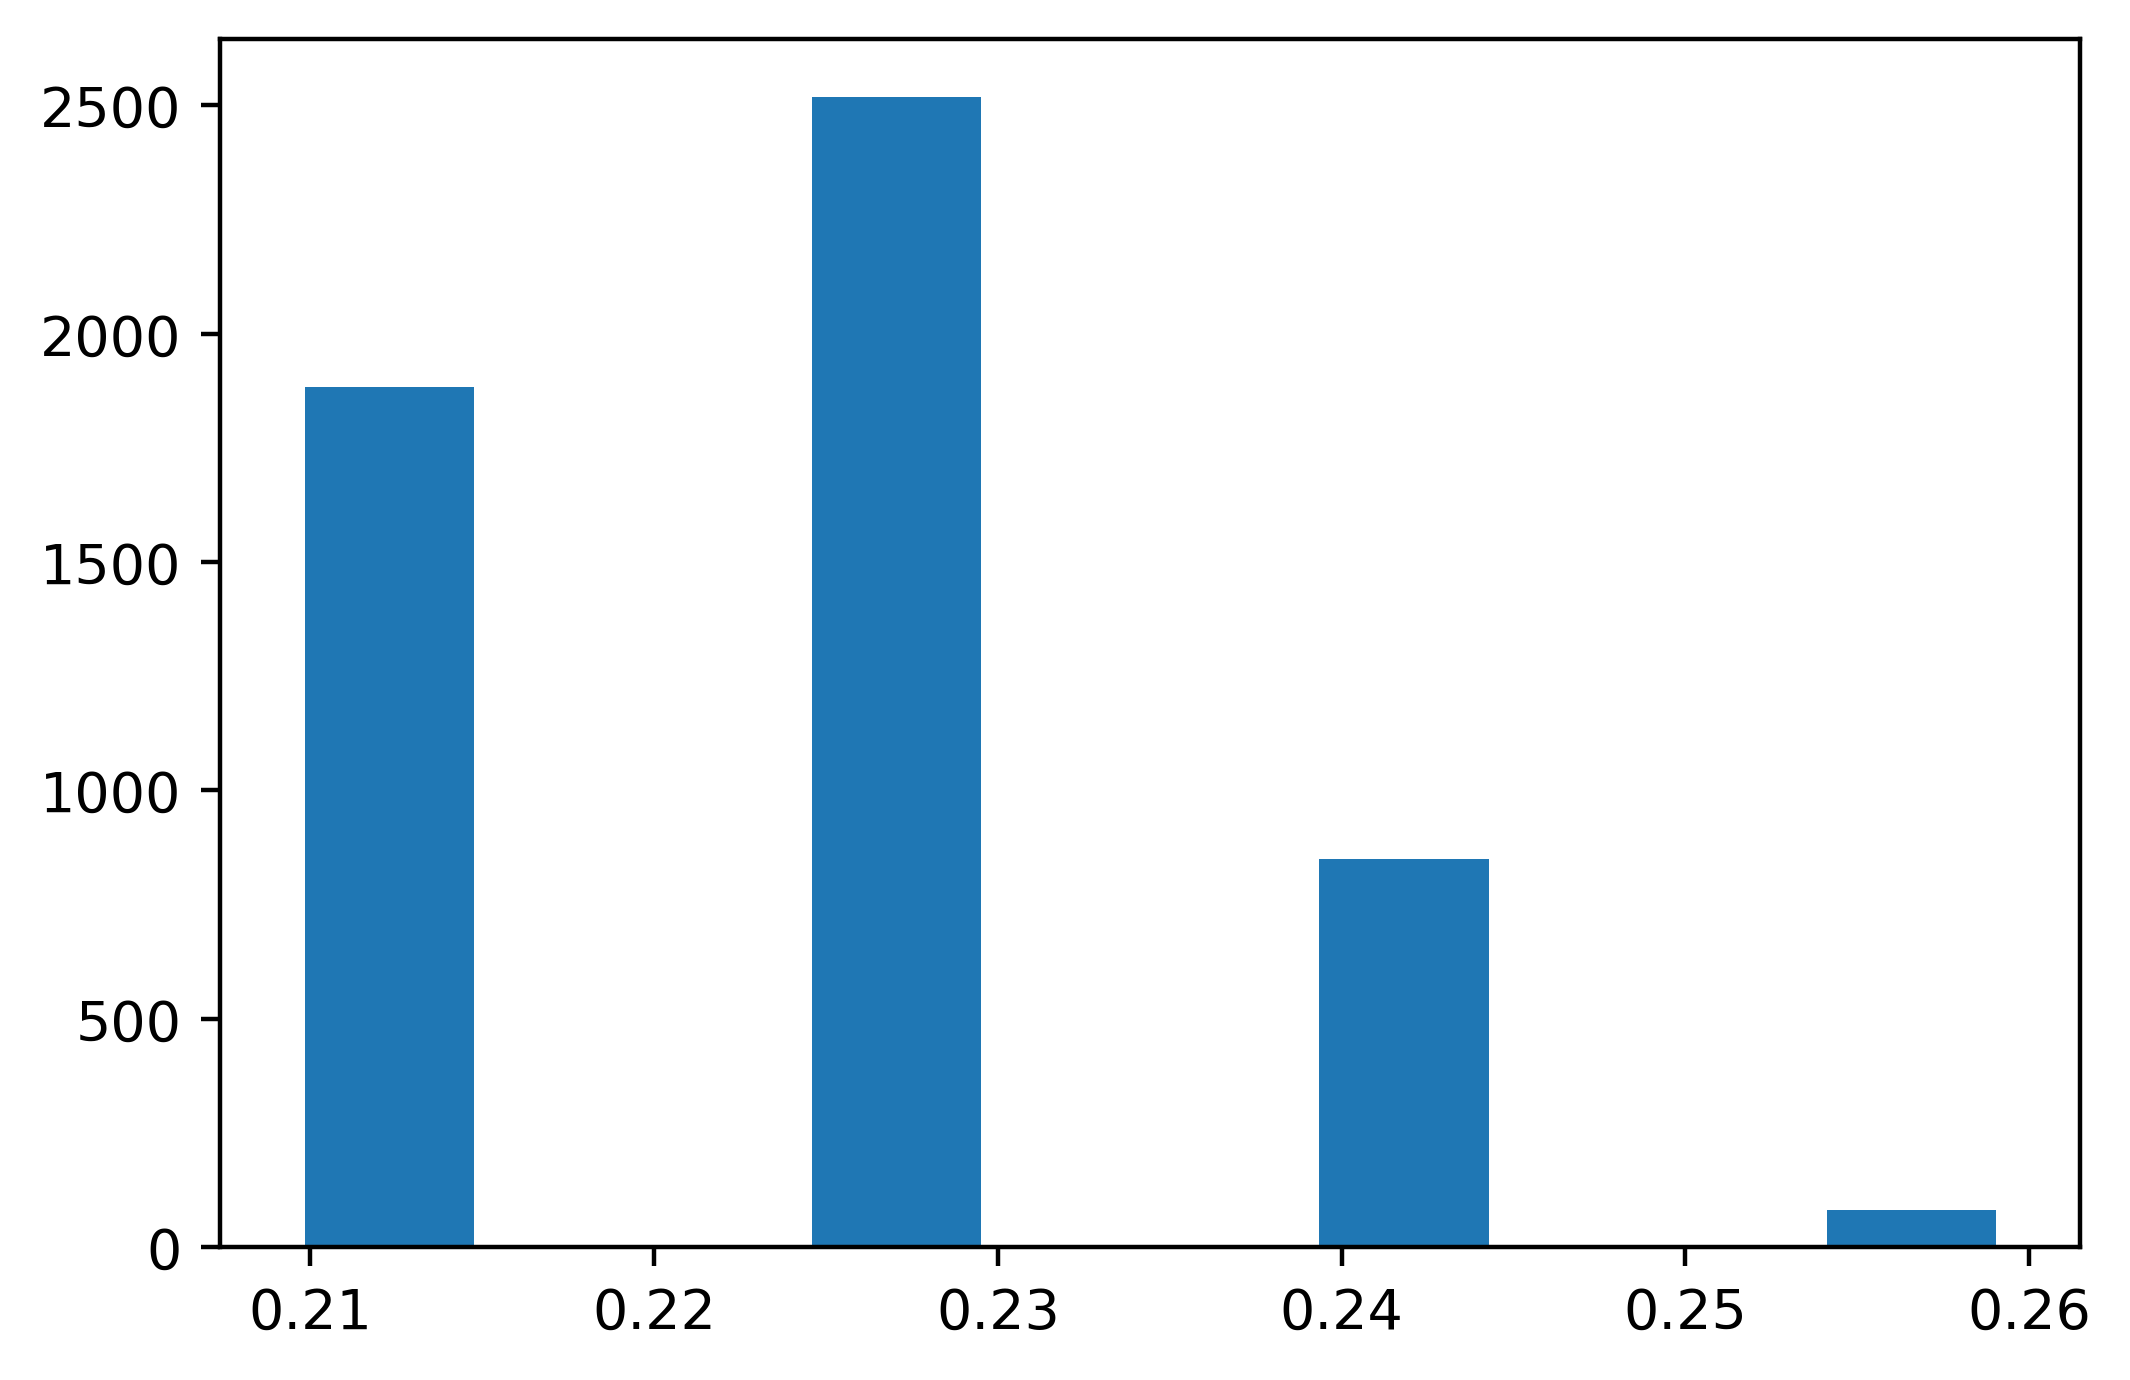

In [38]:
# Criando o histograma e uma plotagem não formatada(sem visualização)
plt.hist(pos_proba)

#### Na saída acima, as informações podem ser úteis e também poderiam ser obtidas diretamente a partir de função np.histogram(). No entanto, aqui estamos mais interessados na plotagem, logo, ajustaremos o tamanho da fonte e adicionaremos alguns rótulos de eixos.

Text(0, 0.5, 'amostra em números')

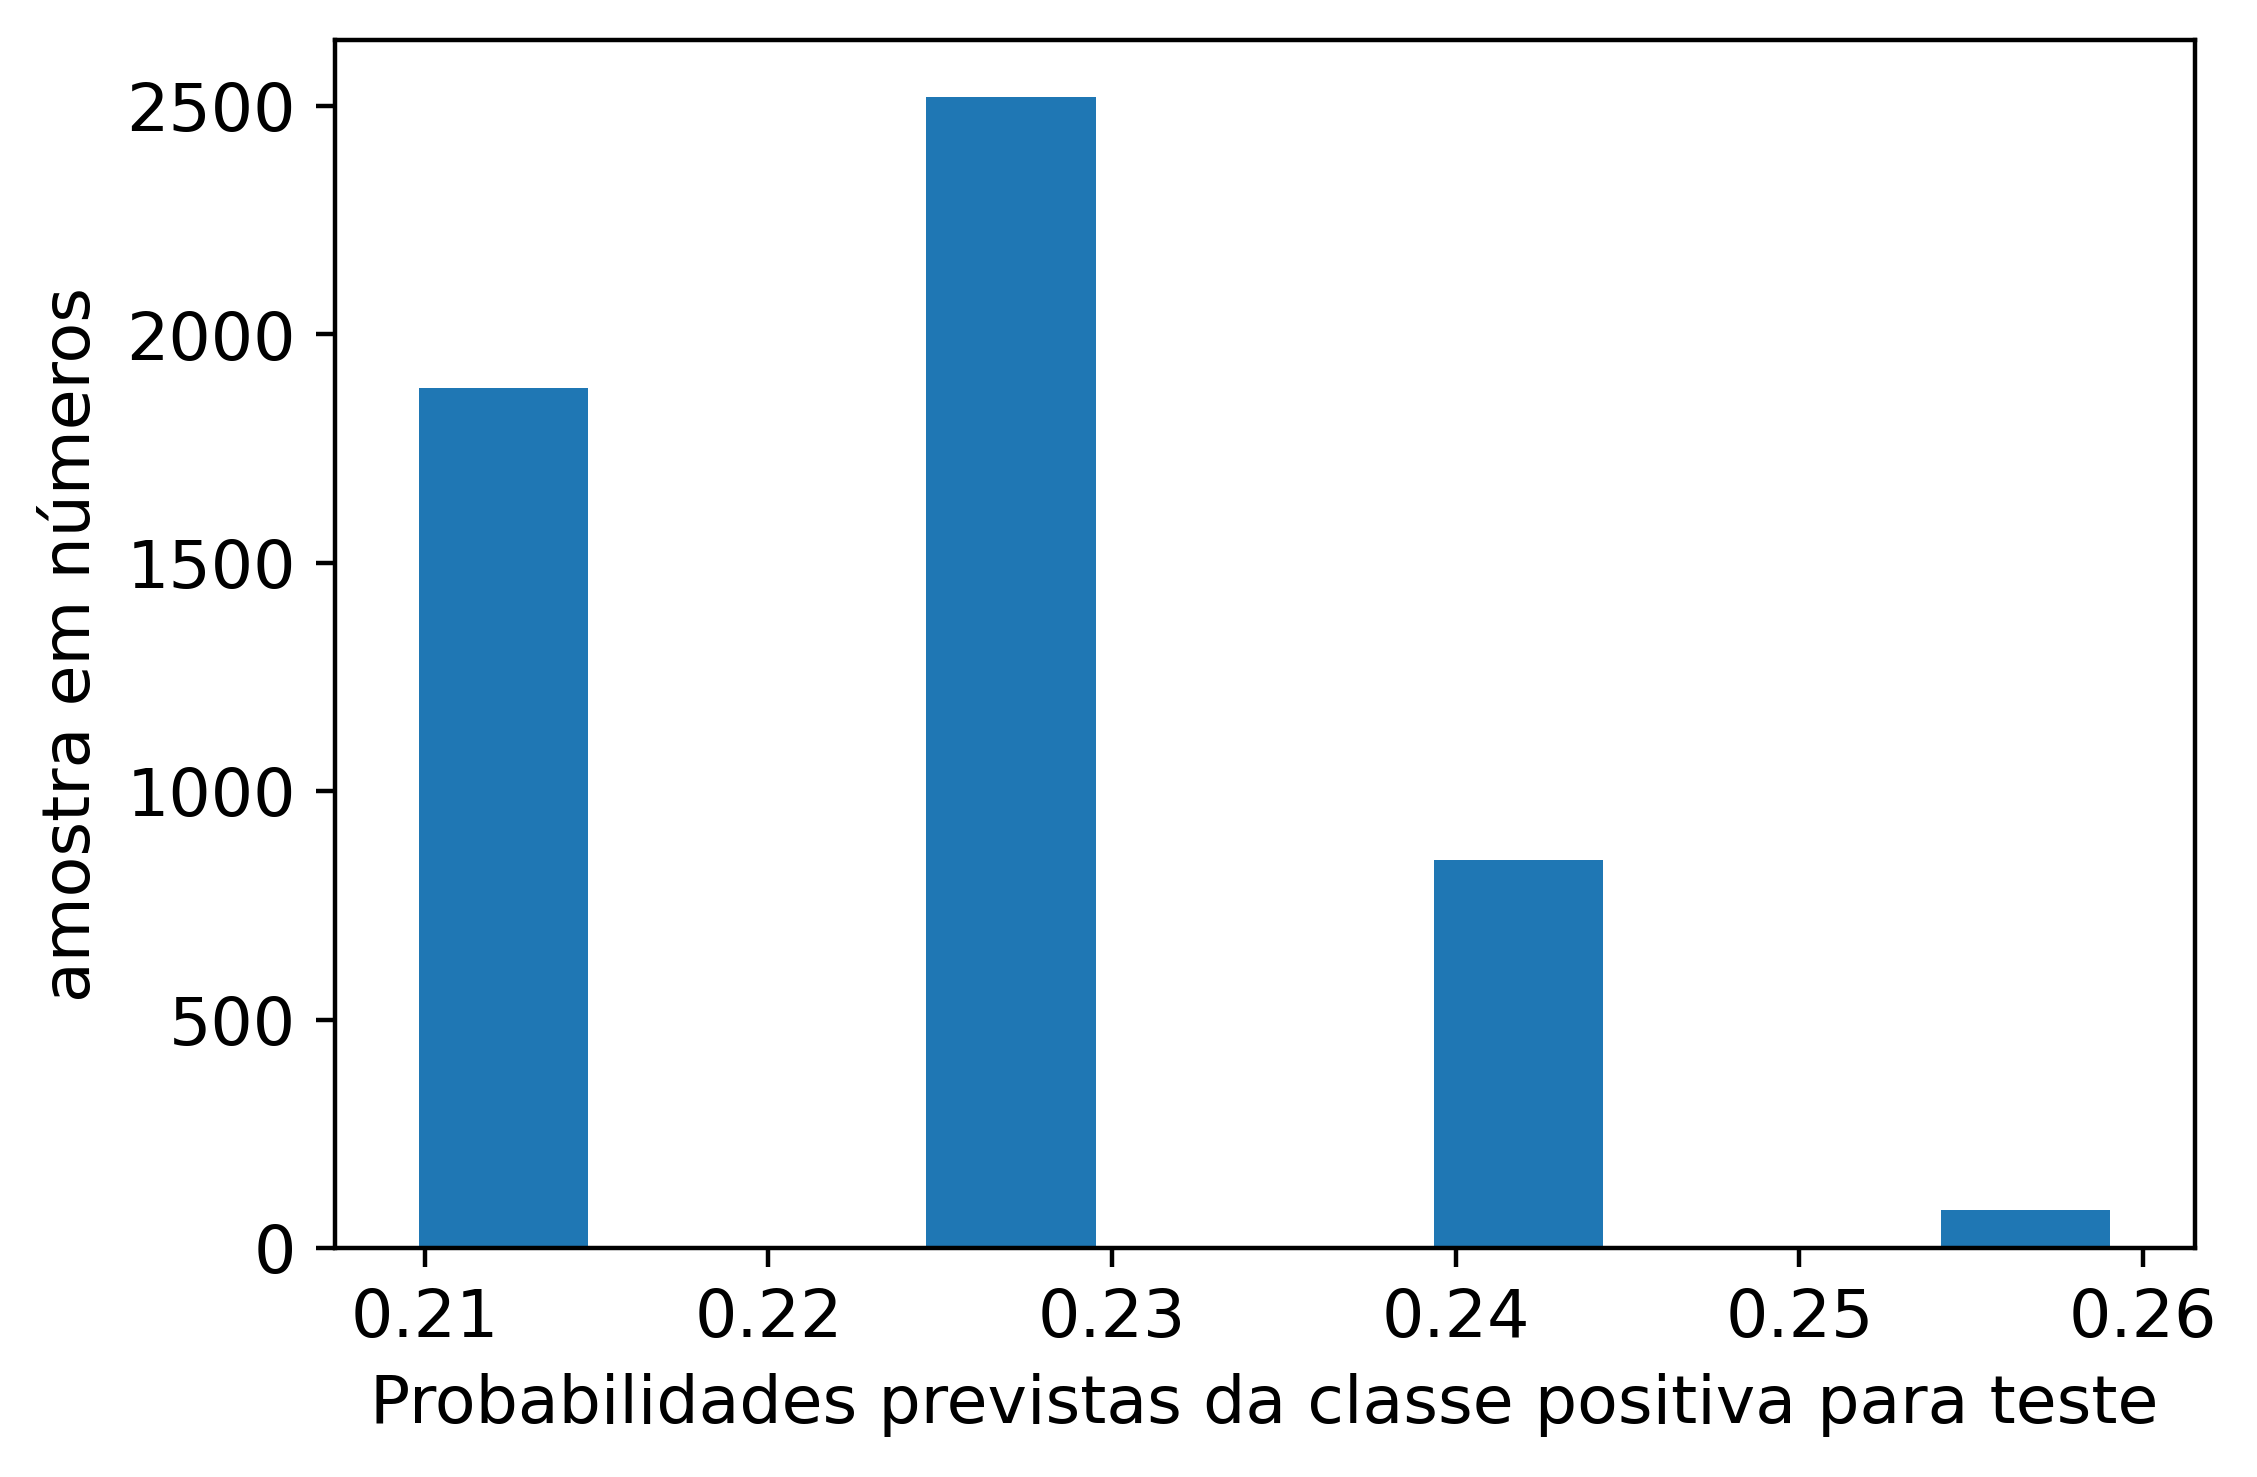

In [39]:
# criando a plotagem dos dados
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Probabilidades previstas da classe positiva para teste')
plt.ylabel('amostra em números')

In [40]:
# agora iremos isolar as probabilidades previstasdas amostras positivas e negativas
pos_amostra_pos_proba = pos_proba[y_test==1]
neg_amostra_pos_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Número de amostras')

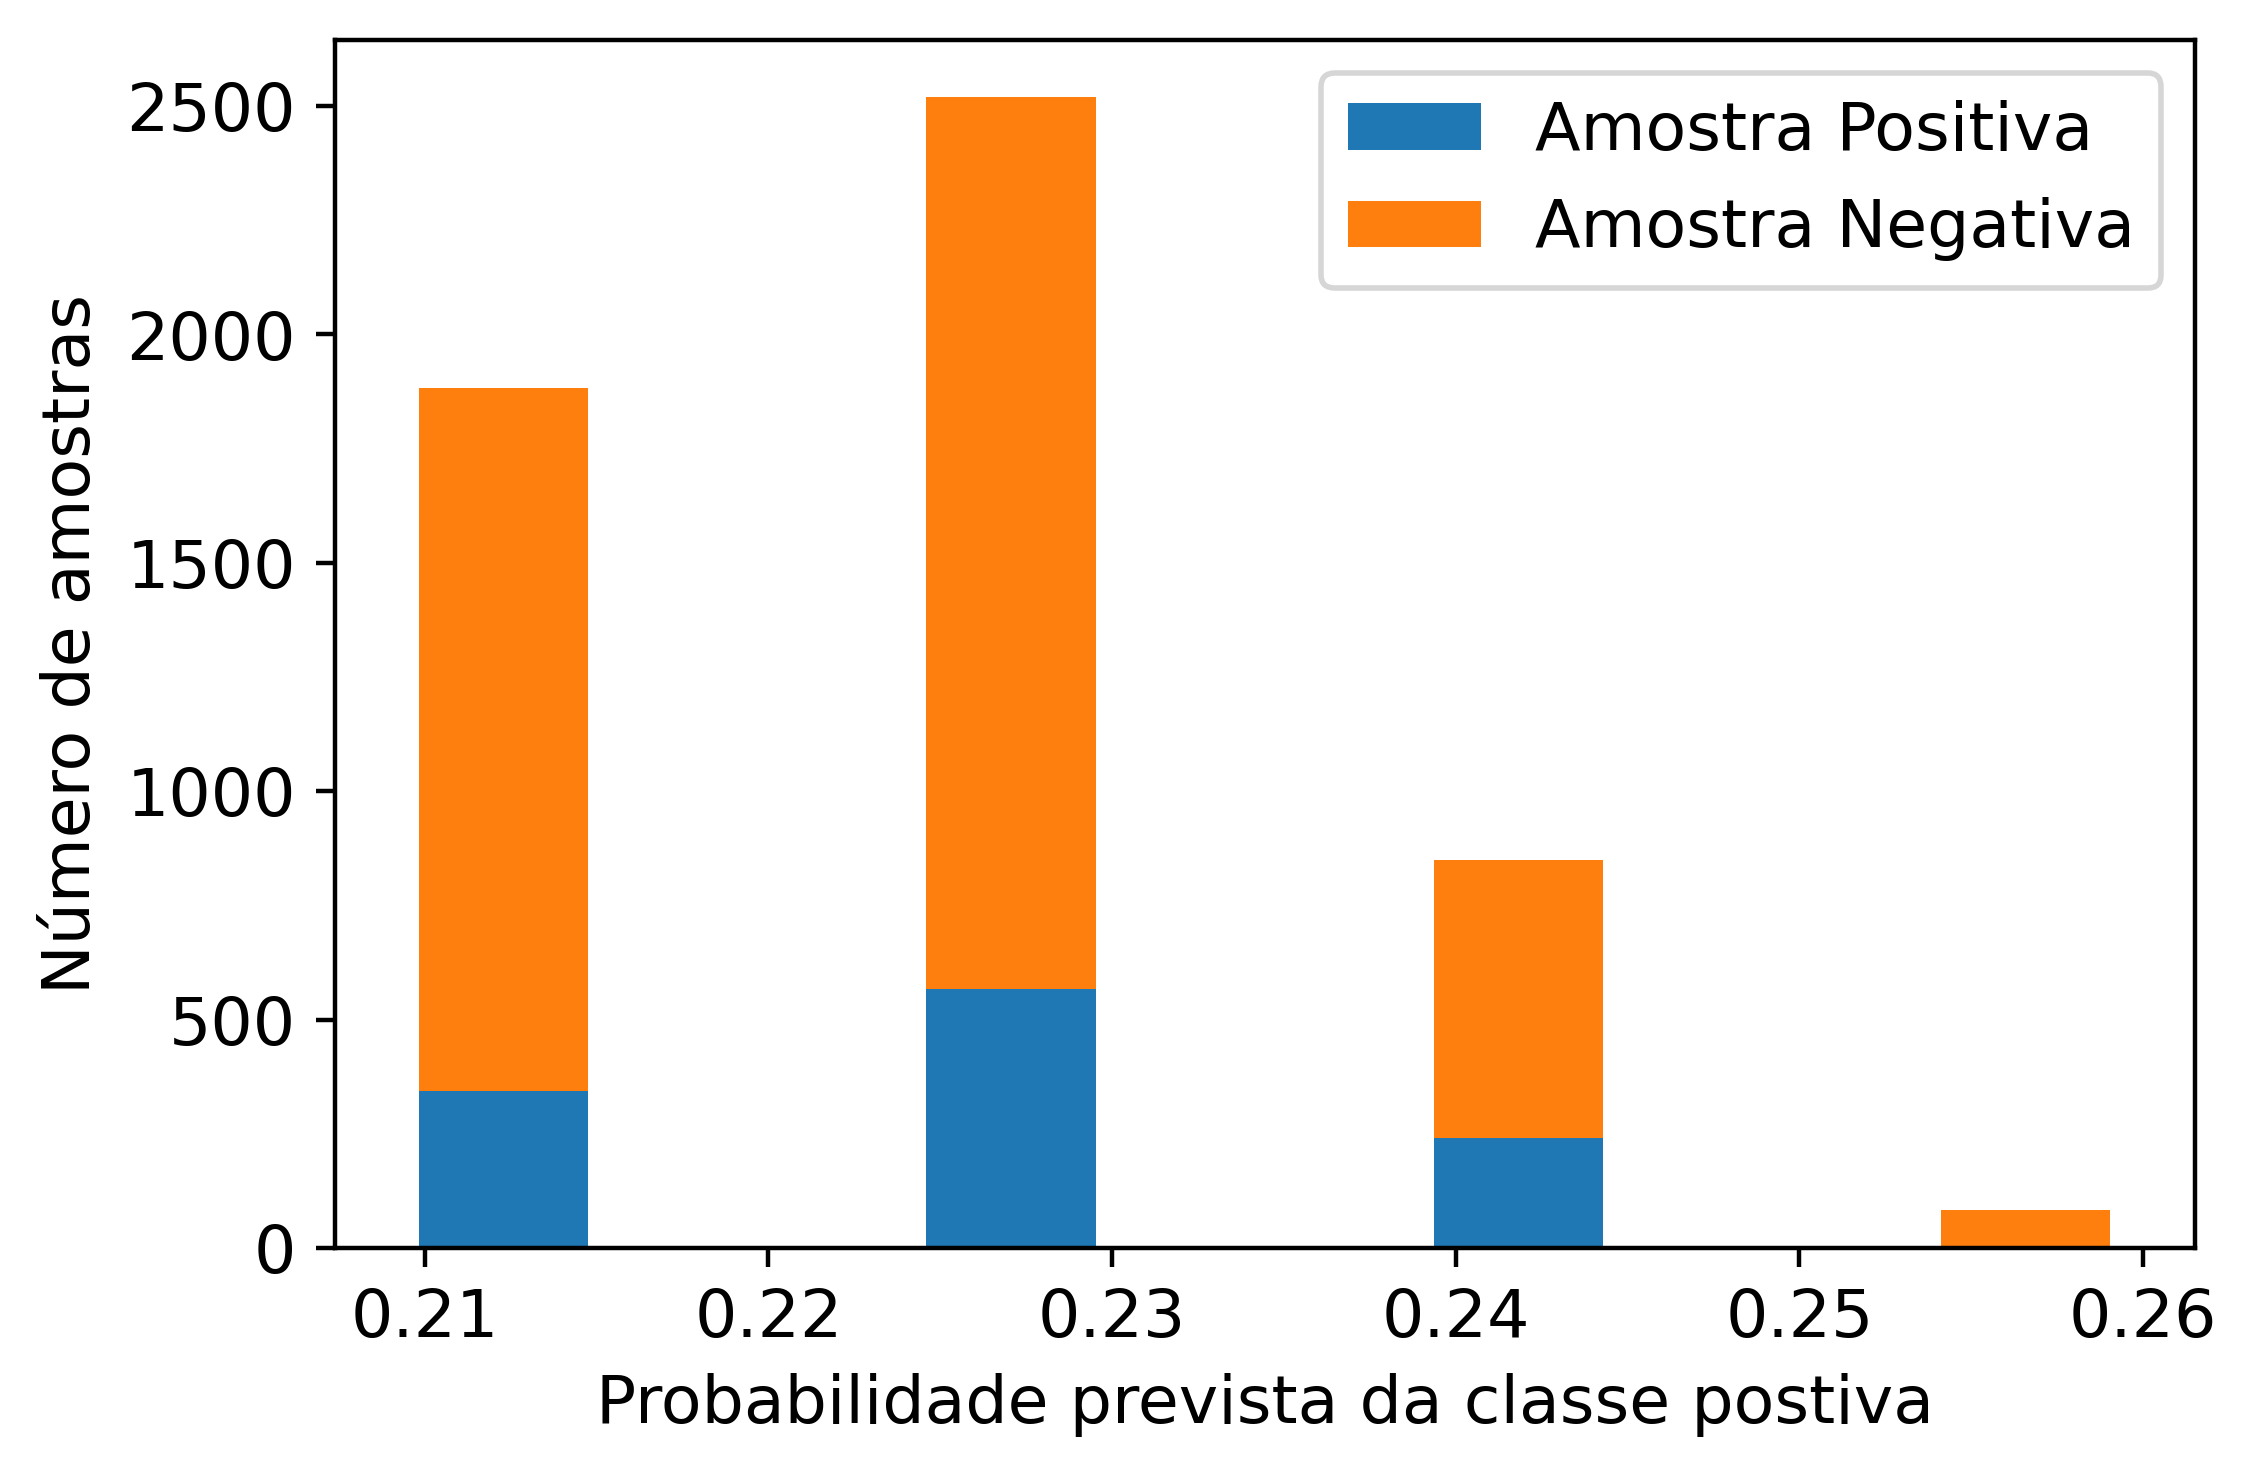

In [41]:
# iremos plotar essas probabilidades como um histograma empilhado.
plt.hist([pos_amostra_pos_proba, neg_amostra_pos_proba], histtype='barstacked')
plt.legend(['Amostra Positiva', 'Amostra Negativa'])
plt.xlabel('Probabilidade prevista da classe postiva')
plt.ylabel('Número de amostras')

# Curva Receiver Operation Characterristic(ROC)

#### a curva ROC é uma plotragem dos pares de taxas de verdadeiros positivos(eixo y) e falsos positivos(eixo x) que resulta da diminuição do limite de 1 até 0. Poderemos deduzir que se o limite for 1, não haverá previsoes positivas, já que as regressão logistica só prevê probabilidades estritamente entre 0 e 1.

In [42]:
# Criando arrays de taxas positivas e falsos positivos para criação da curva ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

###### criando a plotagem utilizando o método plt.plot que criará uma plotagem linear utilizando o primeiro argumento como os valores de 'x' e o segundo argumento como os valores de 'y' e a abreviação '*-' para indicar uma plotagem linear com simbolo de estrela onde os pontos de dados estiverem localizados.

Text(0.5, 1.0, 'Curva ROC')

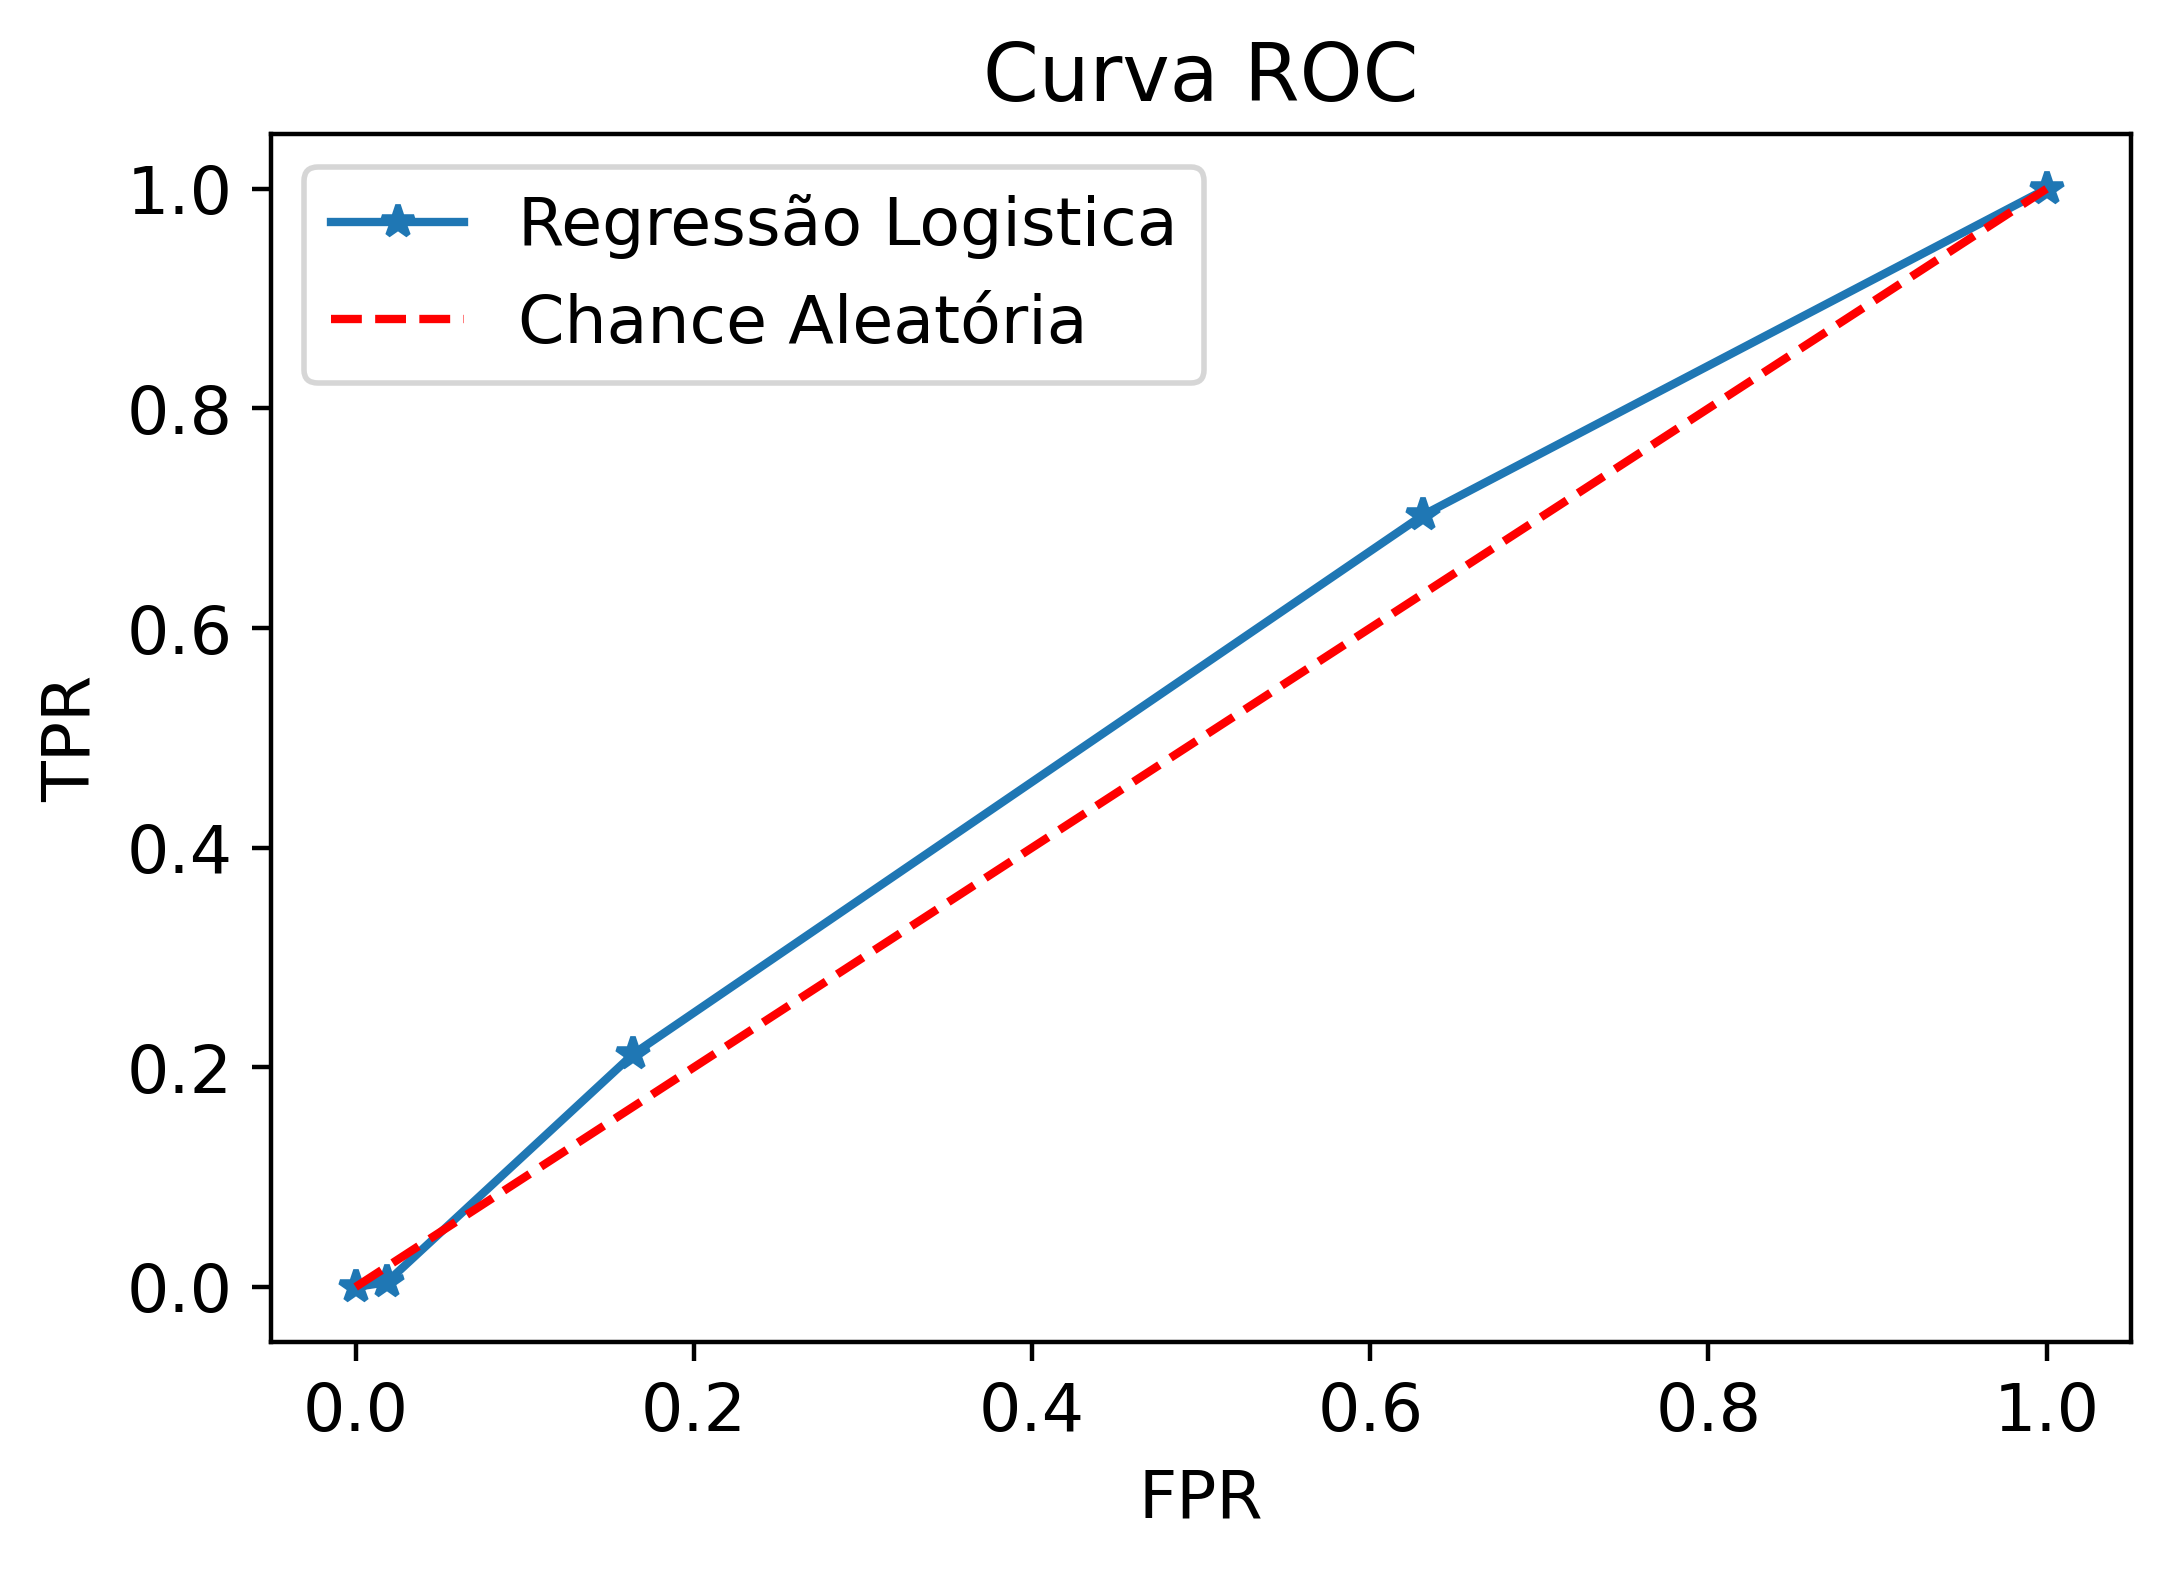

In [43]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1],[0, 1], 'r--')
plt.legend(['Regressão Logistica', 'Chance Aleatória'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')

In [44]:
thresholds

array([1.25903847, 0.25903847, 0.24184056, 0.22543705, 0.20983821])

In [45]:
# calculando a área sob a curva ROC
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642

## Executando a regressão logistica com uma nova característica e criando uma curva "PRECISION-RECALL"


In [46]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(df['LIMIT_BAL'].values.reshape(-1,1),
df['default payment next month']. values, test_size=0.2, random_state=24)

In [47]:
rl_exemplo.fit(x_train_2, y_train_2)

LogisticRegression(solver='liblinear')

In [48]:
# Criando o array de probabilidades previstas para os dados de teste
y_test_2_pred_proba = rl_exemplo.predict_proba(x_test_2)

In [49]:
# Calculadno a ROC AUC usando as probabilidades previstas e os rótulos verdadeiros dos dados do teste
metrics.roc_auc_score(y_test_2, y_test_2_pred_proba[:,1])

0.6201990844642832

Text(0.5, 1.0, 'Curva ROC para regressão Logística com características LIMIT_BAL')

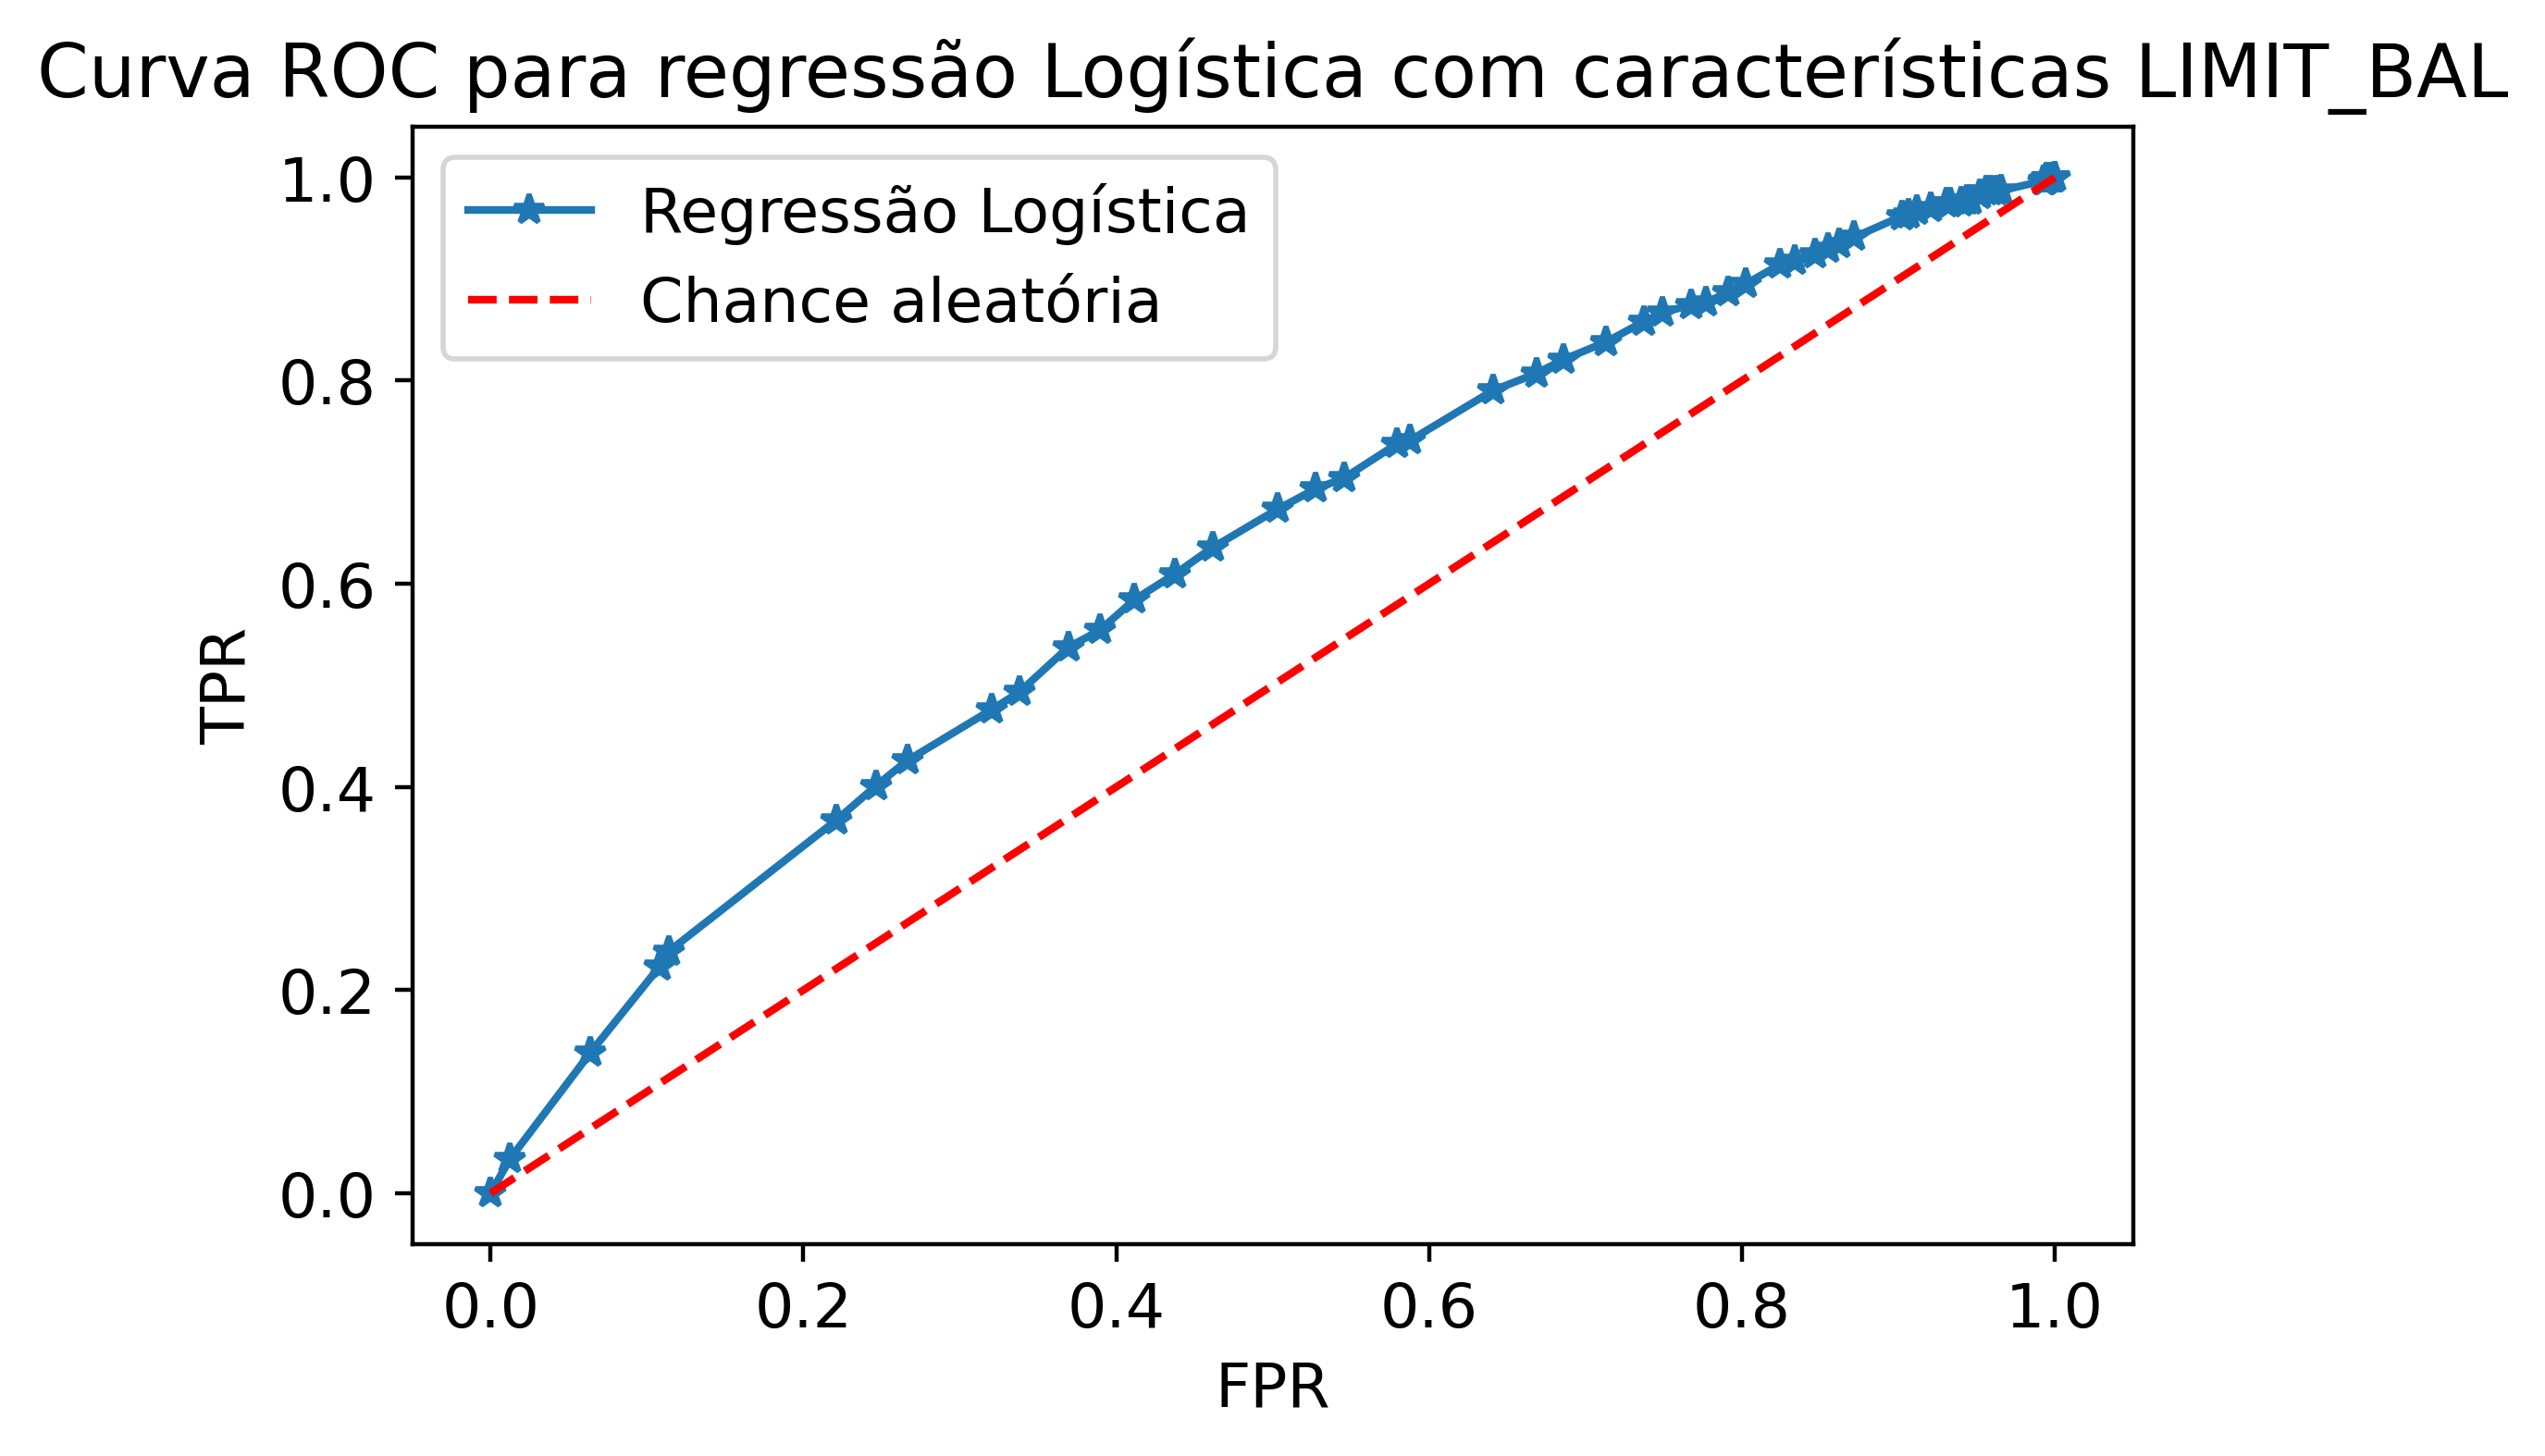

In [50]:
# Plotando a curva ROC
fpr_2, tpr_2, threshoulds_2 = metrics.roc_curve(y_test_2, y_test_2_pred_proba[:,1])
plt.plot(fpr_2, tpr_2, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Regressão Logística', 'Chance aleatória '])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC para regressão Logística com características LIMIT_BAL')

In [51]:
# Resultado da curva Precision_recall baseando-se nos dados de teste e usando a funcionalidade do scikit_learn
precision, recall, thresh_3= \
metrics.precision_recall_curve(y_test_2, y_test_2_pred_proba[:,1])

(0.0, 1.0)

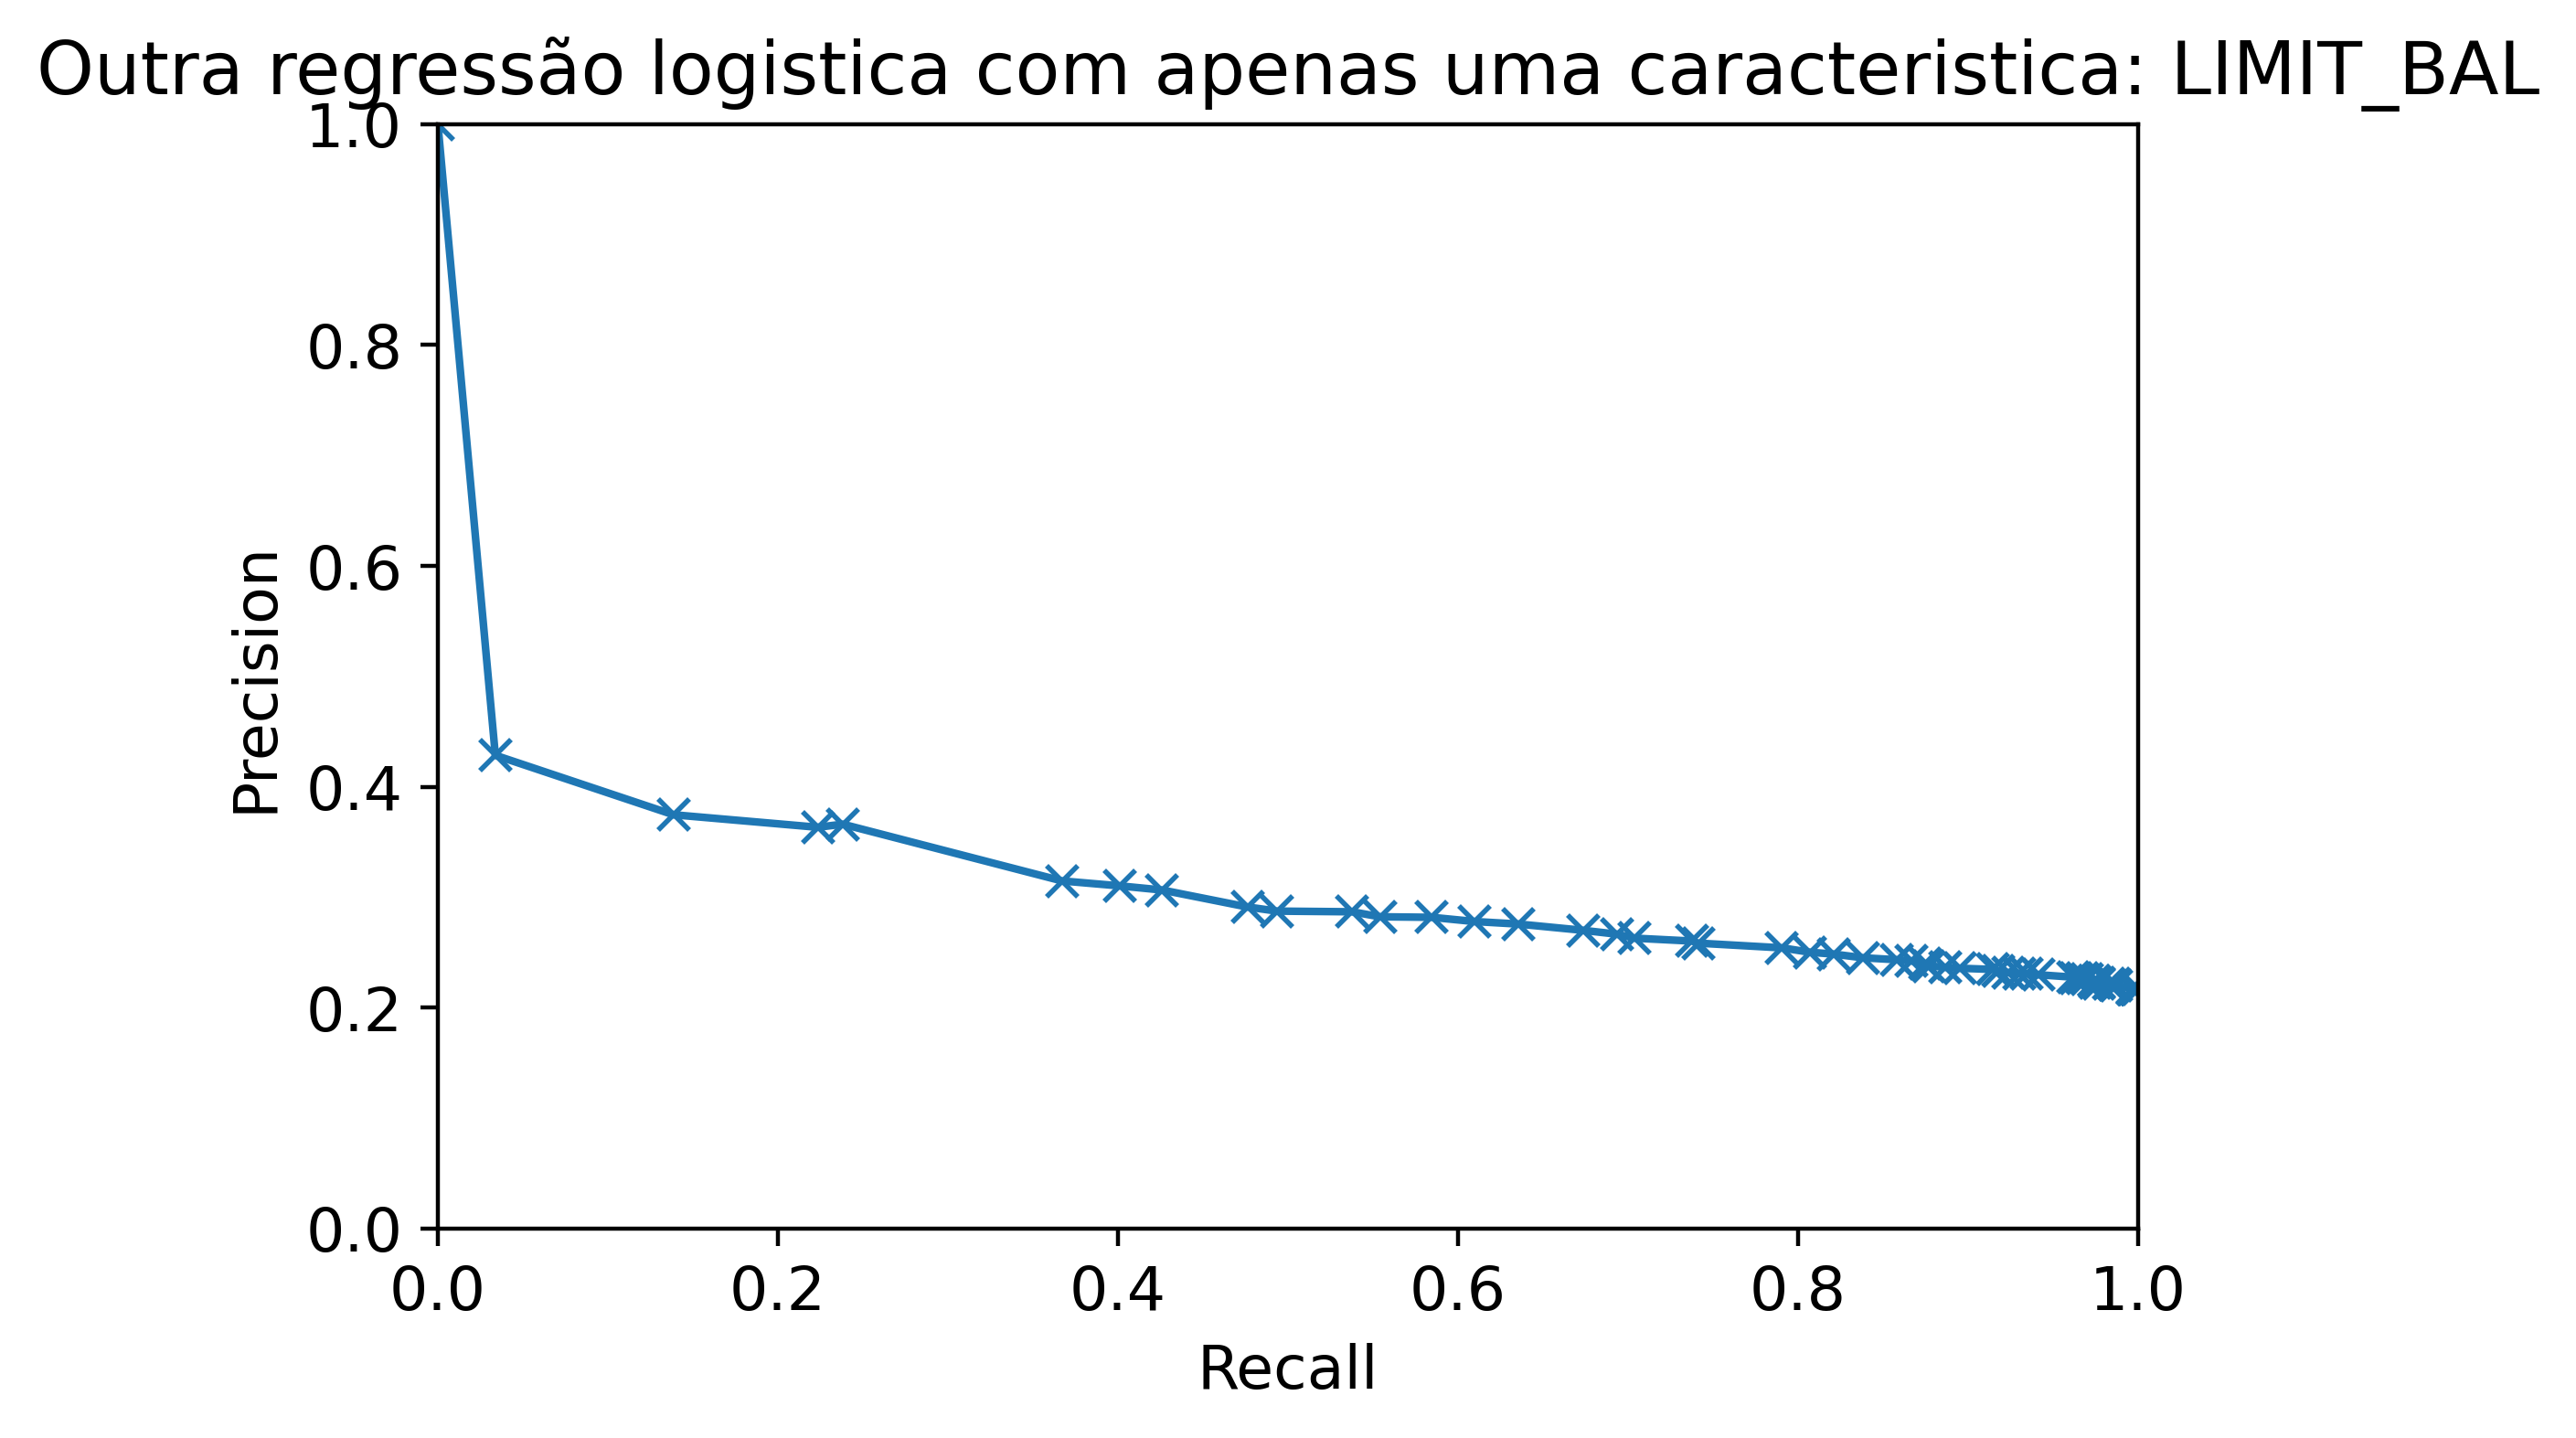

In [52]:
# plotando a curva precision-recall usando o matplotlib
# iremos inserir o recall no eixo x , a precisão no y e configuramos os limites dos eixos com o intervalo [0,1]
plt.plot(recall, precision, '-x')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Outra regressão logistica com apenas uma caracteristica: LIMIT_BAL')
plt.xlim([0,1])
plt.ylim([0,1])

In [53]:
# usando o Scikit-learn para calcular a área sob a curva precision ercall
metrics.auc(recall, precision)

0.31566964427378624

In [54]:
# recalculando a ROC AUC mas para ser utilizado nos dados de treinamento
y_train_2_pred_proba = rl_exemplo.predict_proba(x_train_2)
metrics.roc_auc_score(y_train_2, y_train_2_pred_proba[:,1])

0.6182918113358344

### neste capítulo terminamos a exploração inicial dos dados do estudo de caso examinhando a variável de resposta. Após nos certificarmos de que o dataset estava completo e correto, me senti preparado para explorar a relação entre características e resposta e construir modelos.

# Não!!! este não é o fim....